In [3]:
train_dir = 'D:/projects/brain-tumor-detection/dataset/Training'
test_dir = 'D:/projects/brain-tumor-detection/dataset/Testing'


In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data Augmentation & Rescaling
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    zoom_range=0.1,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(128,128),
    batch_size=32,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(128,128),
    batch_size=32,
    class_mode='categorical'
)


Found 5712 images belonging to 4 classes.
Found 1311 images belonging to 4 classes.


In [9]:
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Input(shape=(128,128,3)),   # <--- Add Input layer first
    layers.Conv2D(32, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(4, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()



Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,305,156 (12.61 MB)

 Trainable params: 3,305,156 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

In [11]:
history = model.fit(
    train_generator,
    epochs=20,
    validation_data=test_generator
)


C:\Users\kvkgi\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 26s 142ms/step - accuracy: 0.5987 - loss: 0.9163 - val_accuracy: 0.7048 - val_loss: 0.8808
Epoch 2/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 34s 189ms/step - accuracy: 0.8193 - loss: 0.4726 - val_accuracy: 0.7101 - val_loss: 0.8354
Epoch 3/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 34s 191ms/step - accuracy: 0.8651 - loss: 0.3671 - val_accuracy: 0.8490 - val_loss: 0.4190
Epoch 4/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 29s 160ms/step - accuracy: 0.8970 - loss: 0.2992 - val_accuracy: 0.8375 - val_loss: 0.4742
Epoch 5/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 26s 146ms/step - accuracy: 0.9087 - loss: 0.2414 - val_accuracy: 0.7773 - val_loss: 0.6722
Epoch 6/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 27s 149ms/step - accuracy: 0.9216 - loss: 0.2107 - val_accuracy: 0.9146 - val_loss: 0.2059
Epoch 7/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 26s 143ms/step - accuracy: 0.9218 - loss: 0.1990 - val_accuracy: 0.8886 - val_loss: 0.3115
Epoch 8/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 25s 137ms/step - accuracy: 0.9446 - loss: 0

In [15]:
model.save('D:/projects/brain-tumor-detection/models/brain_tumor_cnn.keras')


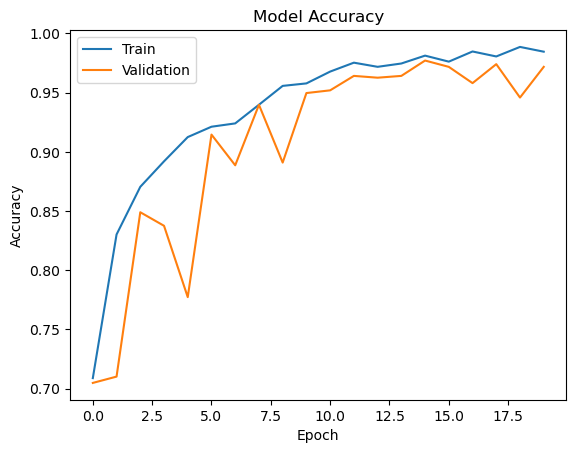

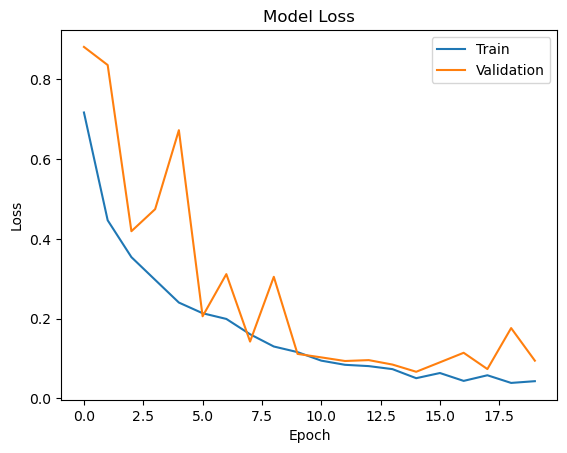

In [17]:
import matplotlib.pyplot as plt

# Plot Accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'])
plt.show()

# Plot Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'])
plt.show()


In [19]:
loss, acc = model.evaluate(test_generator)
print(f"Final Test Accuracy: {acc*100:.2f}%")


41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.9758 - loss: 0.0756
Final Test Accuracy: 97.18%


In [21]:
from tensorflow.keras.models import load_model

loaded_model = load_model('D:/projects/brain-tumor-detection/models/brain_tumor_cnn.keras')

# Evaluate again to confirm
loss, acc = loaded_model.evaluate(test_generator)
print(f"Loaded Model Test Accuracy: {acc*100:.2f}%")


C:\Users\kvkgi\anaconda3\Lib\site-packages\keras\src\saving\saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 12 variables whereas the saved optimizer has 22 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.9787 - loss: 0.0750
Loaded Model Test Accuracy: 97.18%
